## Importing Libraries

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pylab as pl
import sklearn
import shap
shap.initjs()
import tensorflow as tf
from tensorflow.keras.optimizers import Adam

##  Load DataSet

In [3]:
df = pd.read_excel('train_dataset.xlsx', sheet_name='train_set')
df.head()

,Disturbance Y/M/D (UT),CME start_time,Vp,Vlat,Vfrt,Vsw,AW,Tobs
0,2000/02/20 2139,2000/02/17 2006,566.508044,452,82.5,460,92.0,73.55
1,2000/04/06 1639,2000/04/04 1632,865.890828,379,123.0,620,124.0,48.12
2,2000/04/18 2000,2000/04/15 1035,511.749775,409,100.5,470,94.0,81.42
3,2000/05/02 1045,2000/04/29 0430,532.481363,337,130.0,860,172.0,78.25
4,2000/05/13 1700,2000/05/10 2006,604.741171,237,98.0,600,120.0,68.90


### Selecting Input features

In [4]:
X = df[df.columns[2:-1]].values
y = df[df.columns[-1]].values.reshape(-1,1)

print(X[:5])
print(y[:5])

[[566.50804441 452.          82.5        460.          92.        ]
 [865.89082848 379.         123.         620.         124.        ]
 [511.74977483 409.         100.5        470.          94.        ]
 [532.48136315 337.         130.         860.         172.        ]
 [604.74117078 237.          98.         600.         120.        ]]
[[73.55]
 [48.12]
 [81.42]
 [78.25]
 [68.9 ]]


### Selecting Training and Validation Dataset

In [20]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

x_sc = StandardScaler()
y_sc = StandardScaler()
X_train = x_sc.fit_transform(X_train)
X_val = x_sc.fit_transform(X_val)
y_train = y_sc.fit_transform(y_train)
y_val = y_sc.fit_transform(y_val)


# print(X_train[:5])
# print(y_train[:5])


## Loading of Test Dataset

In [6]:
df1 = pd.read_excel('train_dataset.xlsx', sheet_name='test_set')
df1.head()

,Disturbance Y/M/D (UT),CME start_time,Vp,Vlat,Vfrt,Vsw,AW,Tobs
0,2000/01/22 0023,2000/01/18 1754,570,266,85.5,400,80,78.48
1,2000/02/11 0258,2000/02/08 0930,630,294,94.5,510,102,65.47
2,2000/02/11 2352,2000/02/10 0230,810,378,121.5,590,118,45.37
3,2000/02/14 0731,2000/02/12 0431,780,364,117.0,680,136,51.00
4,2001/01/23 1048,2001/01/20 2130,600,280,90.0,550,110,61.30


### Selecting X-y Test dataset

In [23]:
X_test = df[df.columns[2:-1]].values
y_test = df[df.columns[-1]].values.reshape(-1,1)

X_test = tf.constant(X_test, dtype=tf.float32)
y_test = tf.constant(y_test, dtype=tf.float32)

sc_x = StandardScaler()
sc_y = StandardScaler()

X_test = sc_x.fit_transform(X_test)
y_test = sc_y.fit_transform(y_test)
print(X_test[:5])
print()
print(y_test[:5])

[[-0.50260321  1.33260875 -0.74538482 -0.73412974 -0.70020218]
 [ 0.57907824  0.53031191  0.42647094  0.42951921  0.42674073]
 [-0.70044695  0.86002294 -0.22456004 -0.66140168 -0.62976825]
 [-0.62554289  0.06871647  0.62901391  2.17499262  2.11715508]
 [-0.36446556 -1.03032029 -0.29689681  0.28406309  0.28587286]]

[[ 0.36558284]
 [-0.88727729]
 [ 0.75331393]
 [ 0.59713762]
 [ 0.1364912 ]]


### Defining columns Name

In [24]:
# feature_names = ["Vp", "Vlat", "Vfrt", "Vsw", "2aw"]
feature_names = ["V$_{p}$", "V$_{lat}$", "V$_{frt}$", "V$_{sw}$", "AW"]
X_train = pd.DataFrame(X_train, columns=feature_names)
X_test = pd.DataFrame(X_test, columns=feature_names)

print(X_test[:6])
print()
print(X_train[:6])

    V$_{p}$  V$_{lat}$  V$_{frt}$  V$_{sw}$        AW
0 -0.502603   1.332609  -0.745385 -0.734130 -0.700202
1  0.579078   0.530312   0.426471  0.429519  0.426741
2 -0.700447   0.860023  -0.224560 -0.661402 -0.629768
3 -0.625543   0.068716   0.629014  2.174993  2.117155
4 -0.364466  -1.030320  -0.296897  0.284063  0.285873
5 -0.726199   0.453379   0.361368  0.138607  0.145005

    V$_{p}$  V$_{lat}$  V$_{frt}$  V$_{sw}$        AW
0  0.705369   0.369376   0.289766  1.002435  0.986604
1 -0.765048  -0.818422  -0.704871 -0.931170 -0.885475
2 -0.186777  -0.447235  -0.394047 -0.859555 -0.816139
3  0.230216   0.517851   0.414095  0.071440  0.085233
4 -1.076437   1.917756  -1.077860 -1.647320 -1.578837
5 -0.822922  -0.521472  -0.456212 -0.716325 -0.677466


## Loading of Saved Model

In [25]:
model = tf.keras.models.load_model('save_model\Exp_speed_new.keras')

In [10]:
y_pred = model.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


## Implementing SHAP Algorithm

In [26]:
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# Ensure feature names are recognized by SHAP
shap_values.feature_names = feature_names

ExactExplainer explainer: 207it [00:11,  2.63it/s]                         


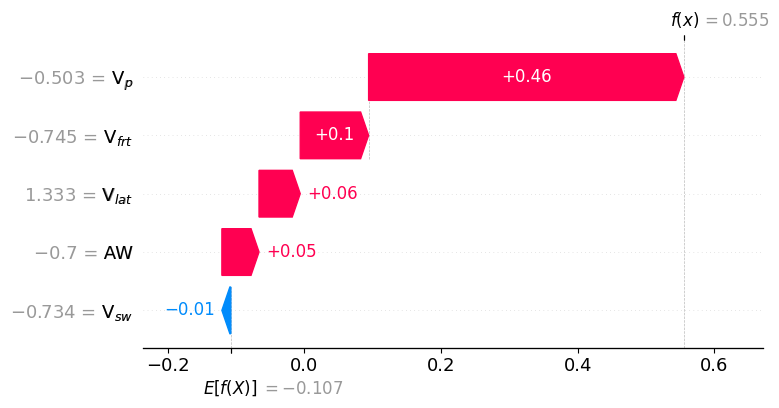

In [ ]:
'waterfall plot for first observation'

shap.plots.waterfall(shap_values[0], max_display=15)

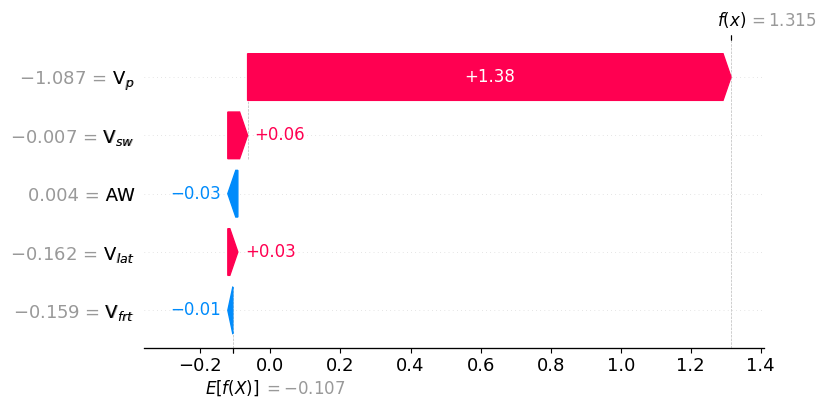

In [28]:
shap.plots.waterfall(shap_values[8], max_display=15)

In [ ]:
'Using SHAP force plot'

# shap.plots.force(shap_values, X_train[0:10])

shap.plots.force(shap_values[0])

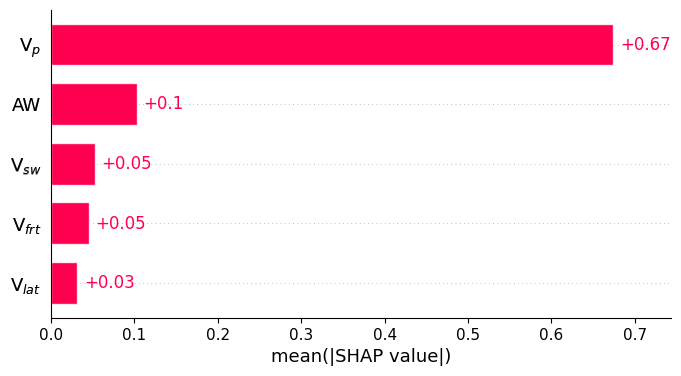

In [ ]:
'Using SHAP bar plot'
shap.plots.bar(shap_values)


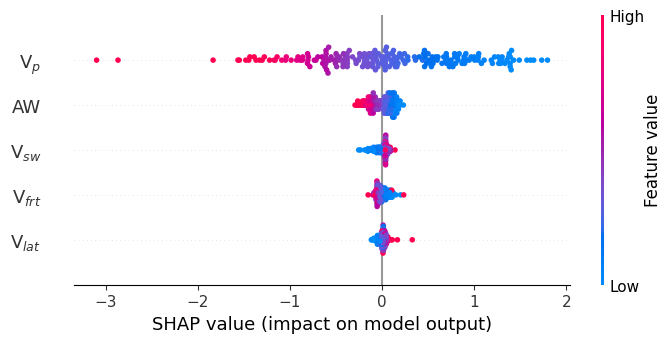

In [ ]:
'Using SHAP Beeswarm plot'
shap.plots.beeswarm(shap_values)


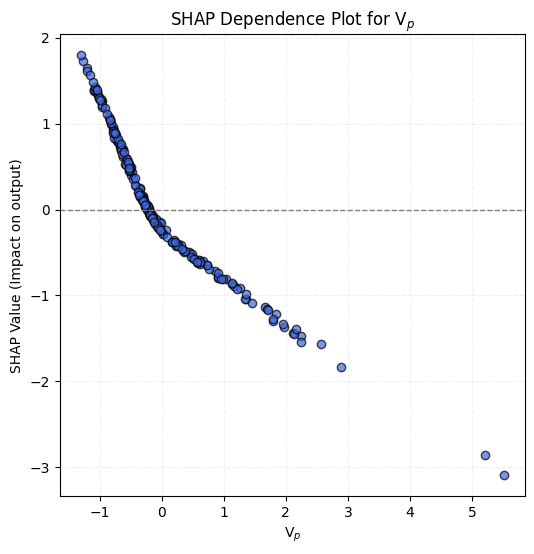

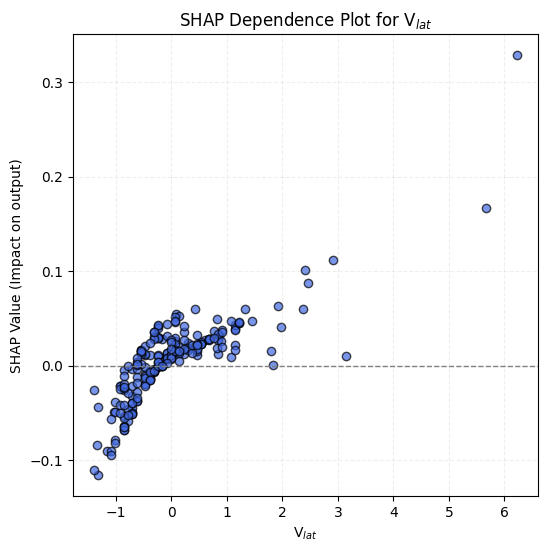

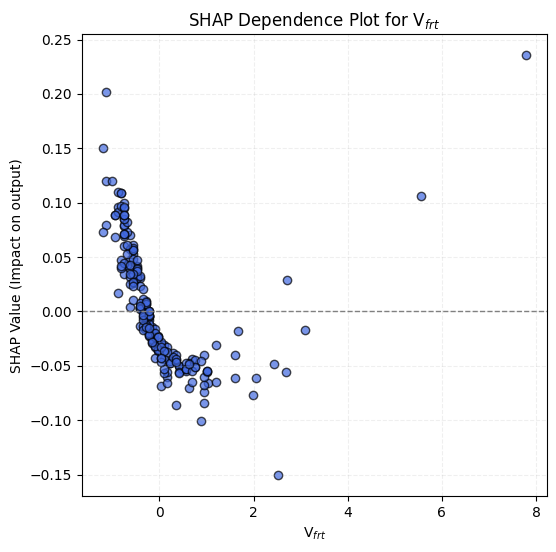

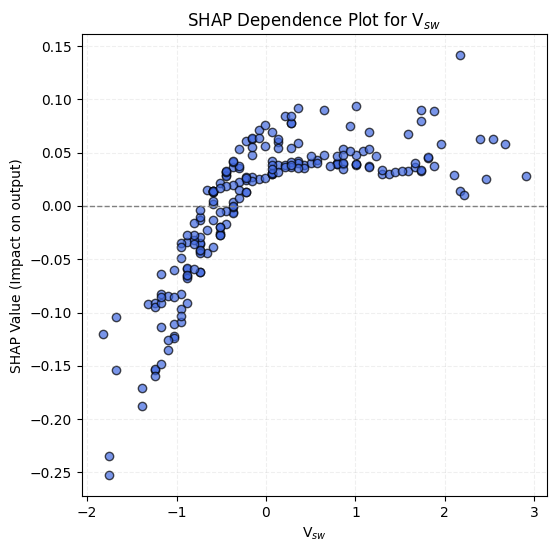

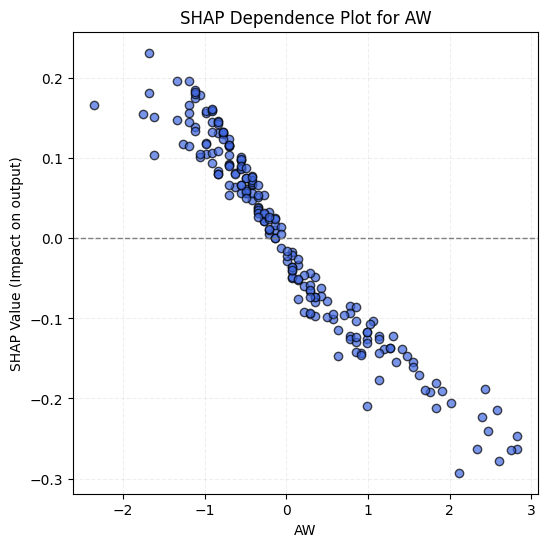

In [ ]:
' Performing Dependent Plot'

import shap
import matplotlib.pyplot as plt

# Loop through each feature and create a scatter plot
for feature in feature_names:
    plt.figure(figsize=(6, 6))
    plt.scatter(X_test[feature], shap_values.values[:, feature_names.index(feature)], 
                color='royalblue', alpha=0.7, edgecolor='k')
    plt.xlabel(f"{feature}")
    plt.ylabel("SHAP Value (Impact on output)")
    plt.title(f"SHAP Dependence Plot for {feature}")
    plt.axhline(y=0, color='gray', linestyle='--', linewidth=1)  # Add a reference line at 0
    plt.grid(True, linestyle='--', alpha=0.2)
    plt.show()



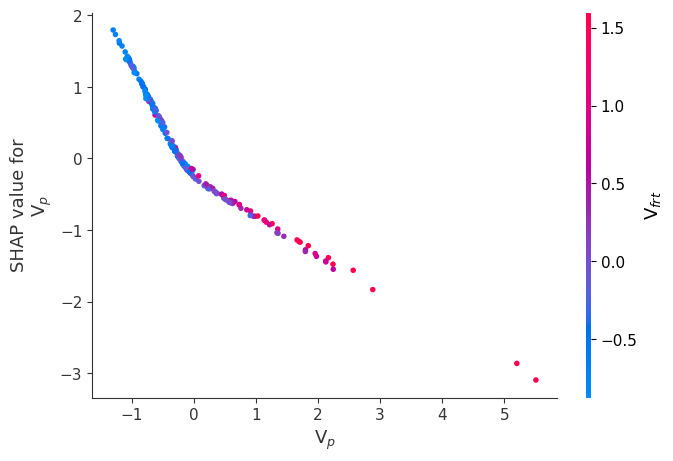

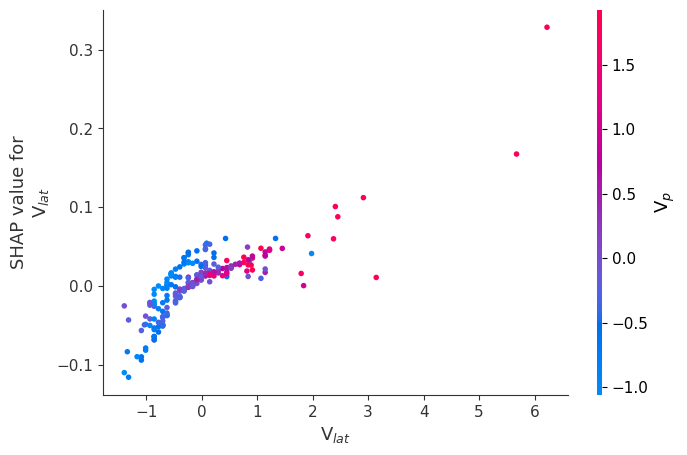

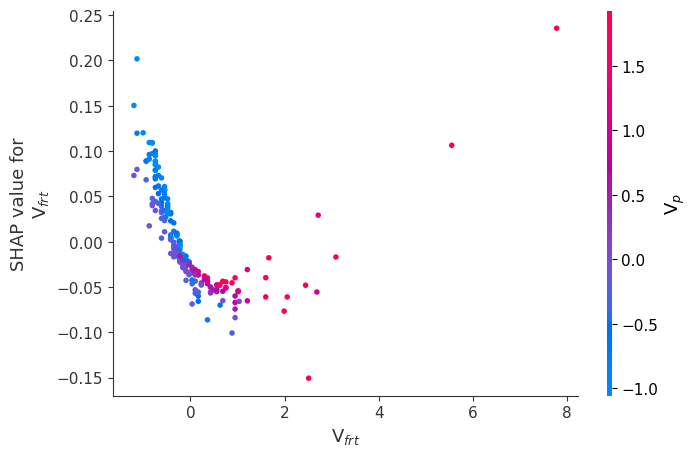

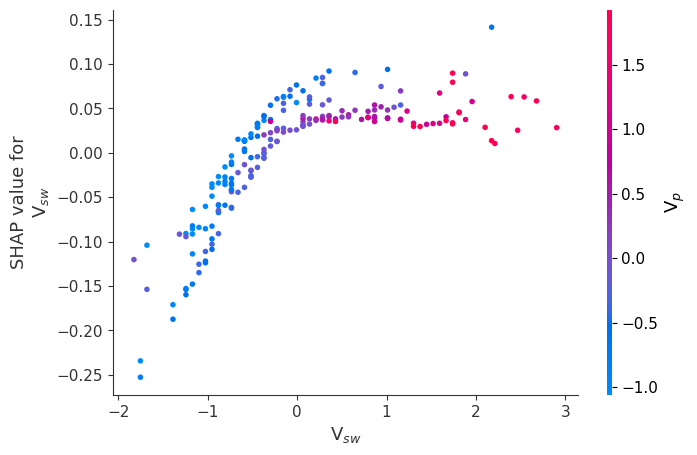

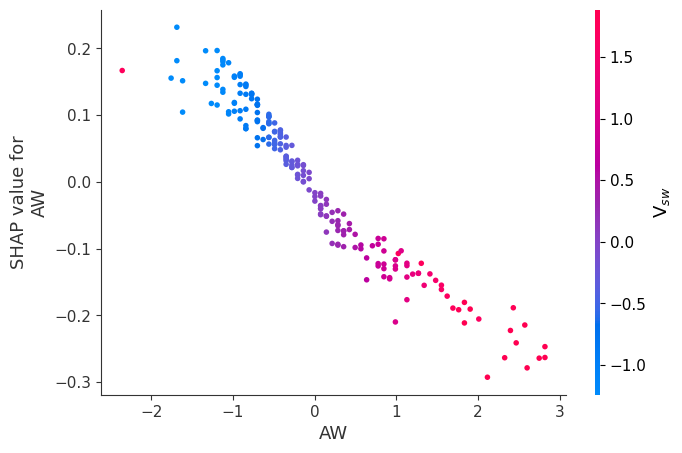

In [ ]:
'Performing SHAP dependent plot'

for feature in feature_names:
    shap.dependence_plot(feature, shap_values.values, X_test)


